# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: October 3 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [16]:
# Import the loader
from yellowbrick.datasets import load_spam

# Load the dataset

dataset = load_spam(return_dataset=True)

df = dataset.to_dataframe()

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

# Print the size (number of samples and features)
print("X shape:", X.shape)
print("y shape:", y.shape)
# print("\nFirst 5 rows of X:\n", X.head())
# print("\nFirst 5 values of y:\n", y.head())


X shape: (4600, 57)
y shape: (4600,)


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [17]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
print(df.isnull().sum())


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **4%** of the data. Use `random_state=0`.

In [ ]:
# TO DO: Create X_small and y_small (1 mark)
from sklearn.model_selection import train_test_split
X_small, X_test, y_small, y_test = train_test_split(X, y, train_size=0.04, random_state=0)

print("X shape:", X_small.shape)
print("y shape:", y_small.shape)

X shape: (184, 57)
y shape: (184,)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

#Full DataSet
model.fit(X, y)
y_pred_full = model.predict(X)


#2 feature first two columns
X_first2Col = X.iloc[:, :2]
model.fit(X_first2Col, y)
y_pred_first2Col = model.predict(X_first2Col)

#Full Feature 4 % sample size
model.fit(X_small, y_small)
y_pred_small = model.predict(X_small)

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different tests implemented in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation data for each of the three datasets and calculate the accuracy results.

In [25]:
from sklearn.model_selection import cross_validate

def evaluate_model(X_data, y_data):
    scores = cross_validate(LogisticRegression(max_iter=2000), X_data, y_data,
                            cv=5,
                            scoring='accuracy',
                            return_train_score=True)
    
    train_acc = np.mean(scores['train_score'])
    val_acc = np.mean(scores['test_score'])
    
    return train_acc, val_acc


#Full DataSet
train_acc_1, val_acc_1 = evaluate_model(X, y)


#2 feature first two columns
train_acc_2, val_acc_2 = evaluate_model(X_first2Col, y)

#Full Feature 4 % sample size
train_acc_3, val_acc_3 = evaluate_model(X_small, y_small)

print("Full dataset: Train accuracy = {:.3f}, Validation accuracy = {:.3f}".format(train_acc_1, val_acc_1))

print("Full dataset: Train accuracy = {:.3f}, Validation accuracy = {:.3f}".format(train_acc_2, val_acc_2))
print("Full dataset: Train accuracy = {:.3f}, Validation accuracy = {:.3f}".format(train_acc_3, val_acc_3))

Full dataset: Train accuracy = 0.931, Validation accuracy = 0.913
Full dataset: Train accuracy = 0.616, Validation accuracy = 0.610
Full dataset: Train accuracy = 0.966, Validation accuracy = 0.896


### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training accuracy and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [28]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
import pandas as pd

# Create a dictionary with the results
results_dict = {
    "Data size": [X.shape, X_first2Col.shape, X_small.shape],
    "Training Accuracy": [train_acc_1, train_acc_2, train_acc_3],
    "Validation Accuracy": [val_acc_1, val_acc_2, val_acc_3]
}

# Convert to pandas DataFrame
results = pd.DataFrame(results_dict)

# Print the results
print(results)


    Data size  Training Accuracy  Validation Accuracy
0  (4600, 57)           0.930978             0.913261
1   (4600, 2)           0.616250             0.609783
2   (184, 57)           0.966051             0.896246


### Step 5.2: Visualize Classification Errors (2 marks)

In this section, print the confusion matrix to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset (1 mark)
model = LogisticRegression(max_iter=2000)
model.fit(X, y)
y_pred_full = model.predict(X)


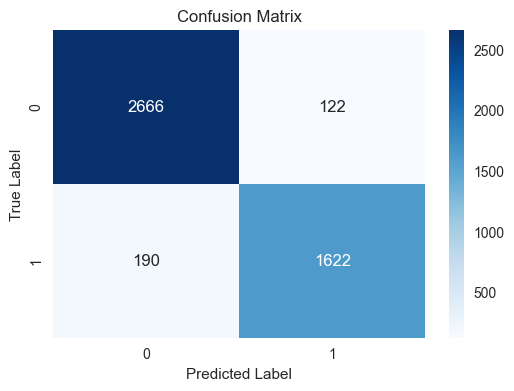

In [34]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
cm = confusion_matrix(y, y_pred_full)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")  # fmt='d' removes scientific notation
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Questions (8 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. Why do the training and validation accuracy behave this way when the amount of data is changed? Relate your answer to concepts discussed in class.
1. Do these results change based on the `random_state` selected for splitting the data into X_small and y_small? Why do you think it behaves this way?
1. In this case, what do a false positive and a false negative represent? Which one is worse?

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

## Part 2: Regression (18 marks)

For this section, we will be using the auto-mpg dataset from Lab 2. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded from UCI website: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG 

Load the auto-mpg dataset and inspect the first few rows

In [ ]:

# 1️⃣ Read the .data file
df = pd.read_csv(
    'auto-mpg.data',       # replace with your path
    delim_whitespace=True, # columns are space-separated
    header=None,
    na_values='?'          # '?' indicates missing values
)

# 2️⃣ Add column names
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
              'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# 3️⃣ Remove rows with missing horsepower (optional)
df = df.dropna(subset=['horsepower'])


# 4️⃣ Split into features and target
X = df.drop(['mpg', 'car_name'], axis=1)  # feature matrix (exclude target and name)
y = df['mpg']                             # target vector

X = X[X['horsepower'].notna()]
y = y.loc[X.index]
# 5️⃣ Inspect first few rows and first few columns of the feature matrix
print("First 5 rows of X (features):")
print(X.iloc[:, :5].head())  # first 5 rows, first 5 columns

print("\nFirst 5 values of y (target):")
print(y.head())


First 5 rows of X (features):
   cylinders  displacement  horsepower  weight  acceleration
0          8         307.0       130.0  3504.0          12.0
1          8         350.0       165.0  3693.0          11.5
2          8         318.0       150.0  3436.0          11.0
3          8         304.0       150.0  3433.0          12.0
4          8         302.0       140.0  3449.0          10.5

First 5 values of y (target):
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


In [42]:
# TO DO: Import auto-mpg data and inspect the first few rows (0.5 marks)
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nFirst 5 rows of X:\n", X.head())
print("\nFirst 5 values of y:\n", y.head())

# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


X shape: (398, 7)
y shape: (398, 1)

First 5 rows of X:
    displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

First 5 values of y:
     mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0
{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'nu

### Step 2: Data Processing (2.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [50]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
print(X.isnull().sum())
print(y.isnull().sum())


cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
0


Remove any columns that do not have numerical data

In [51]:
# TO DO: Remove non-numeric data (0.5 marks)
# X['horsepower'] = X['horsepower'].fillna(X['horsepower'].mean())
X = X[X['horsepower'].notna()]
y = y.loc[X.index]
print(X.isnull().sum())
print("X shape:", X.shape)
print("y shape:", y.shape)

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
X shape: (392, 7)
y shape: (392,)


Split the auto-mpg data into the feature matrix and target vector. Inspect the first few columns of the feature matrix to make sure it split properly

In [ ]:
# TO DO: Create feature matrix and target vector (1 mark) 


### Step 3: Implement and Validate Machine Learning Model (2.5 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Instantiate model `LinearRegression()`
1. Train and validate the machine learning model using the training set (using `cross_validate()` with `cv=5` and `scoring='r2'`)
1. Print the training and validation accuracy 

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scores = cross_validate(model, X_train, y_train,
                            cv=5,
                            scoring='r2',
                            return_train_score=True)
train_acc = np.mean(scores['train_score'])
val_acc = np.mean(scores['test_score'])
print("Full dataset: Train accuracy = {:.3f}, Validation accuracy = {:.3f}".format(train_acc, val_acc))

Full dataset: Train accuracy = 0.819, Validation accuracy = 0.802


### Step 4: Test Model (1 mark)

Calculate the testing accuracy using the R^2 score

In [ ]:
# TO DO: ADD YOUR CODE HERE
print()

### Step 5: Visualize Results (1.5 marks)

1. Plot the relationship between each of the features and the target vector using `pairplot`
1. Plot the correlation matrix
1. Print the coefficients for each feature and the intercept

The highest corrolations are with the following columns:
 Index(['mpg', 'weight', 'displacement', 'horsepower', 'cylinders'], dtype='object')


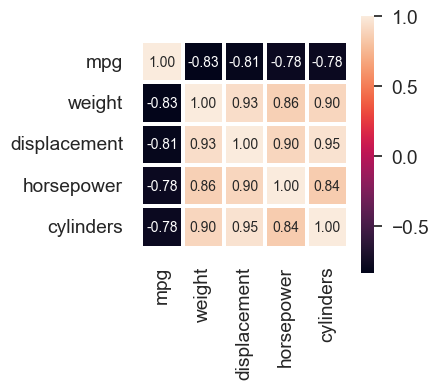

In [73]:

# 1️⃣ Read the .data file
df = pd.read_csv(
    'auto-mpg.data',       # replace with your path
    delim_whitespace=True, # columns are space-separated
    header=None,
    na_values='?'          # '?' indicates missing values
)

# 2️⃣ Add column names
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
              'weight', 'acceleration', 'model_year', 'origin',"name"]

# 3️⃣ Remove rows with missing horsepower (optional)
df = df.dropna(subset=['horsepower'])
df.drop(columns=['name'], inplace=True)

df.head()

# run the code bellow to have a better view of corrolations
def plot_corr_matrix(df, nr_c, targ) :
    """
    A function for getting the features with the highest
    corrolation with the target variable.
    """

    # get the values
    corr = df.select_dtypes(include=['number']).corr()
    corr_abs = corr.abs()

    # get the names in the largest to smallest order
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    # plot the figure
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
    print('The highest corrolations are with the following columns:\n', cols)
    plt.show()

plot_corr_matrix(df, nr_c=5, targ='mpg')

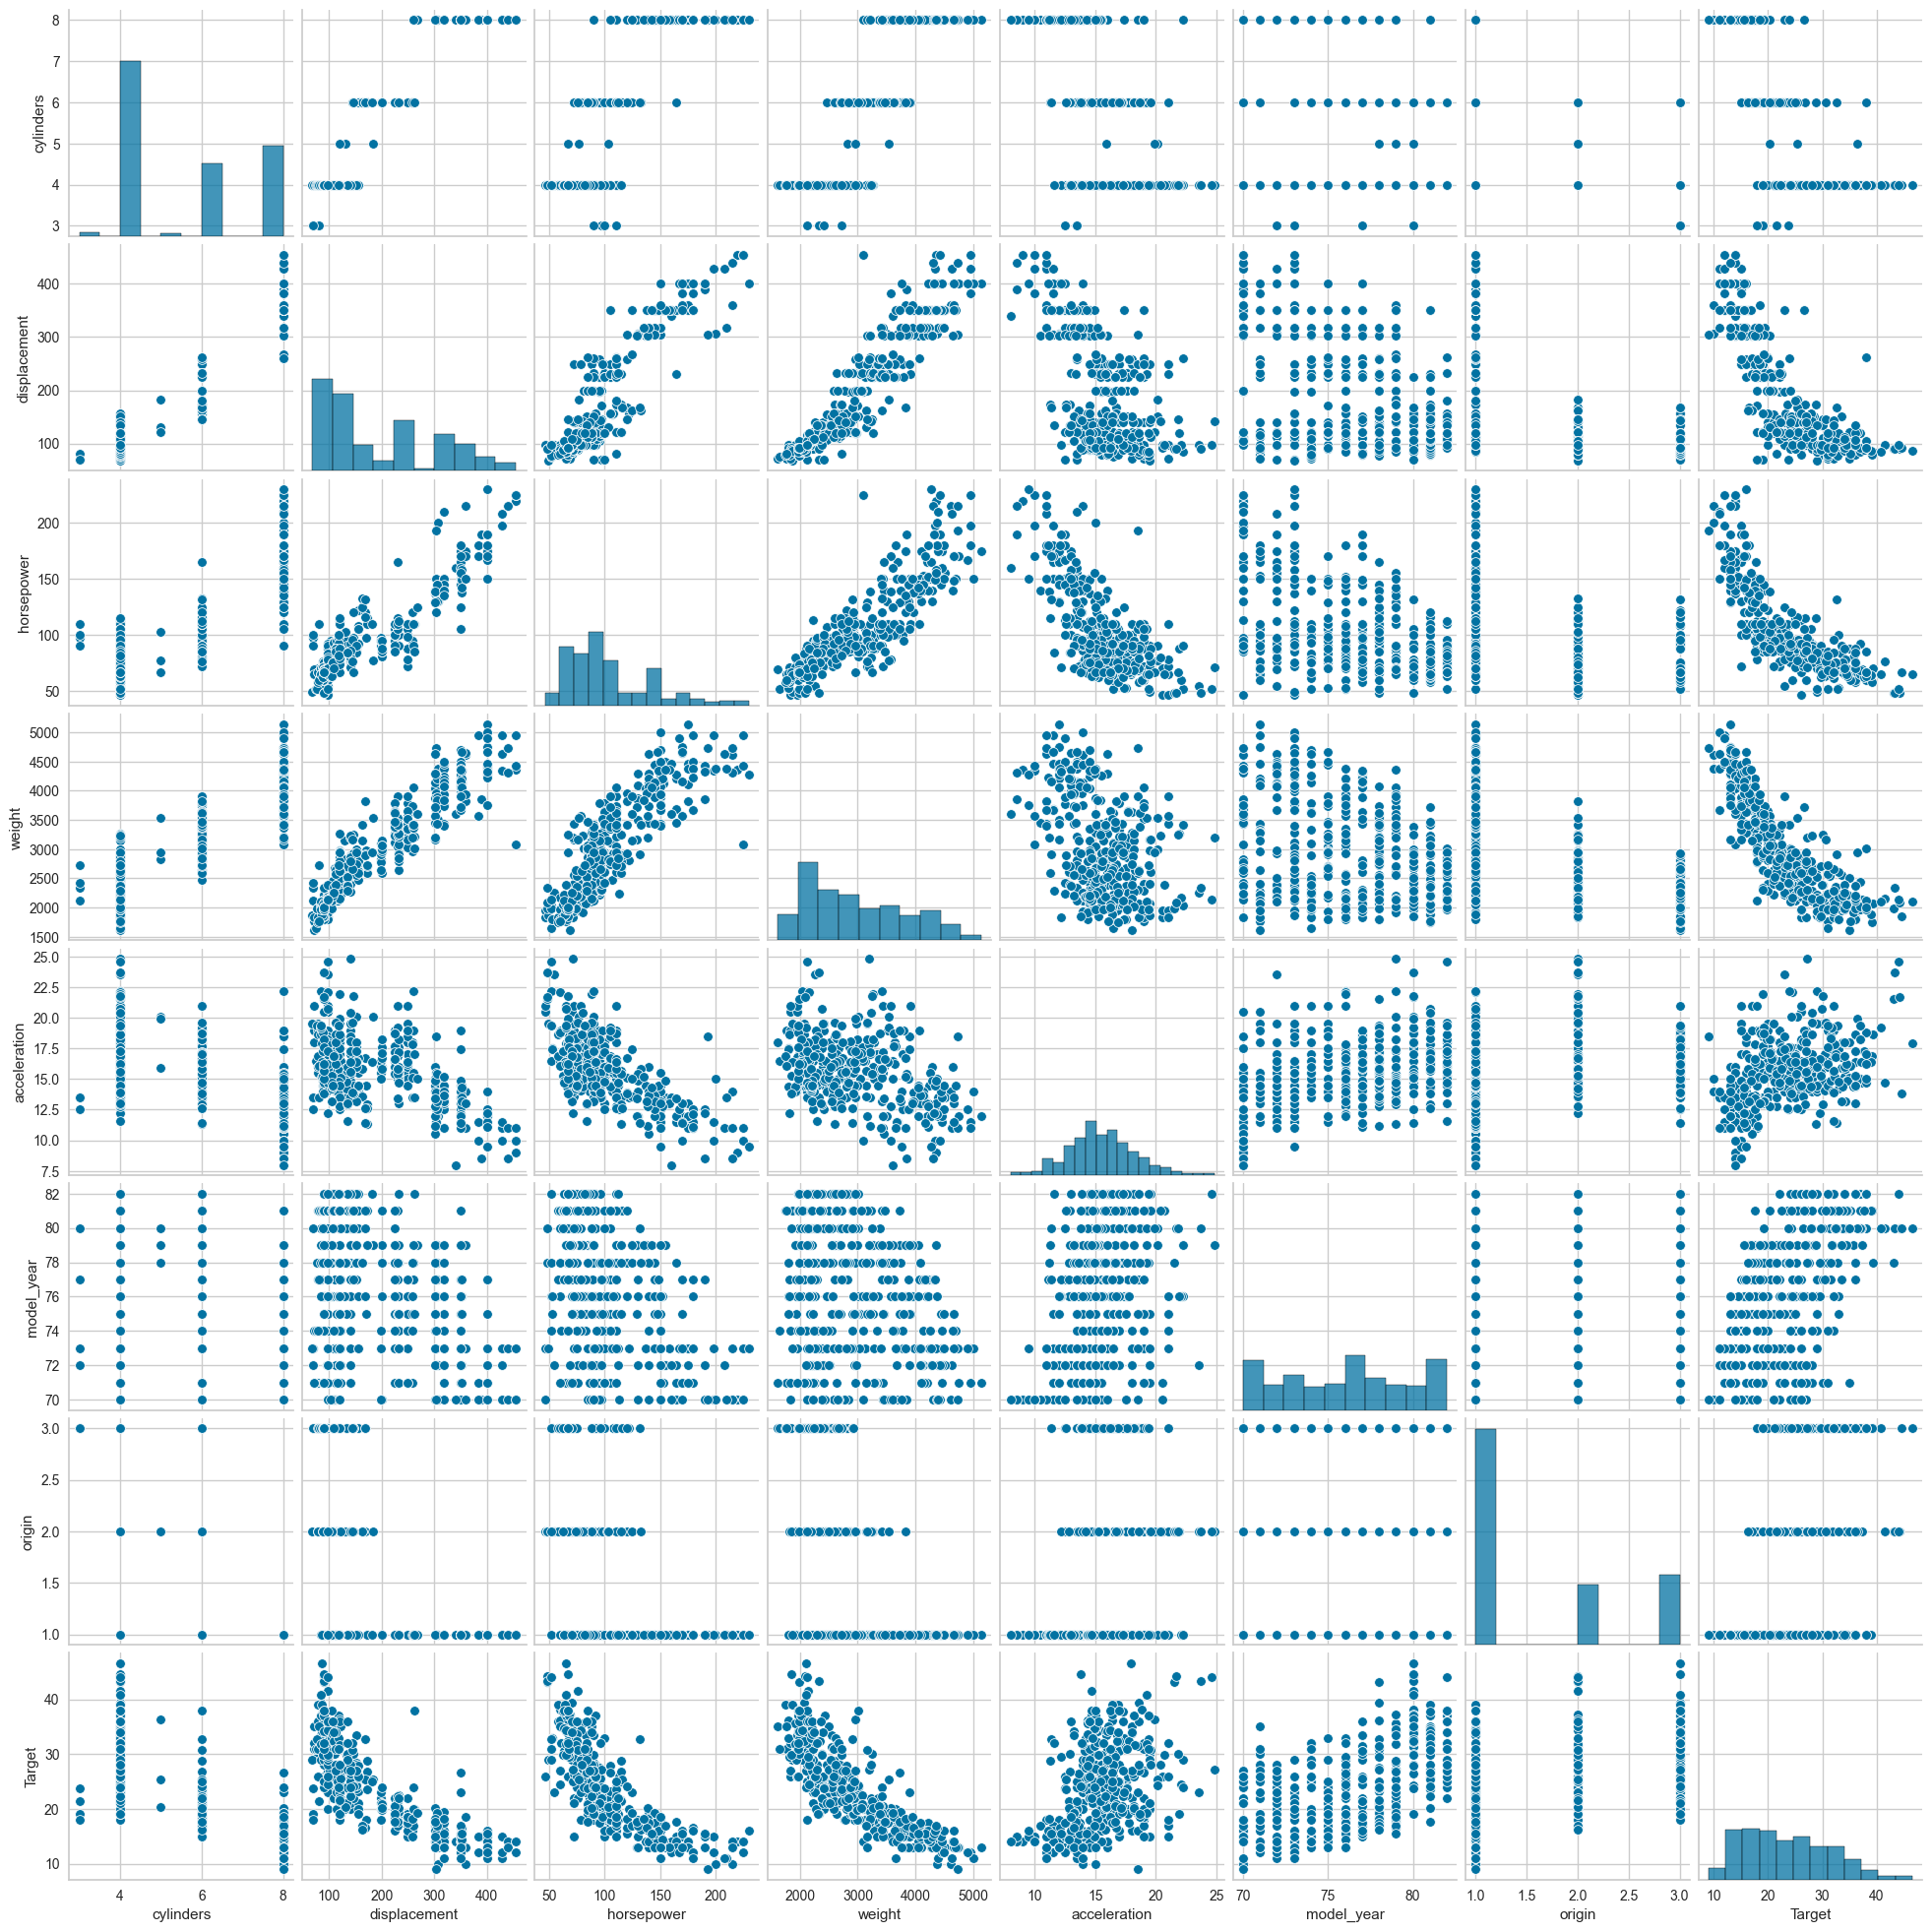

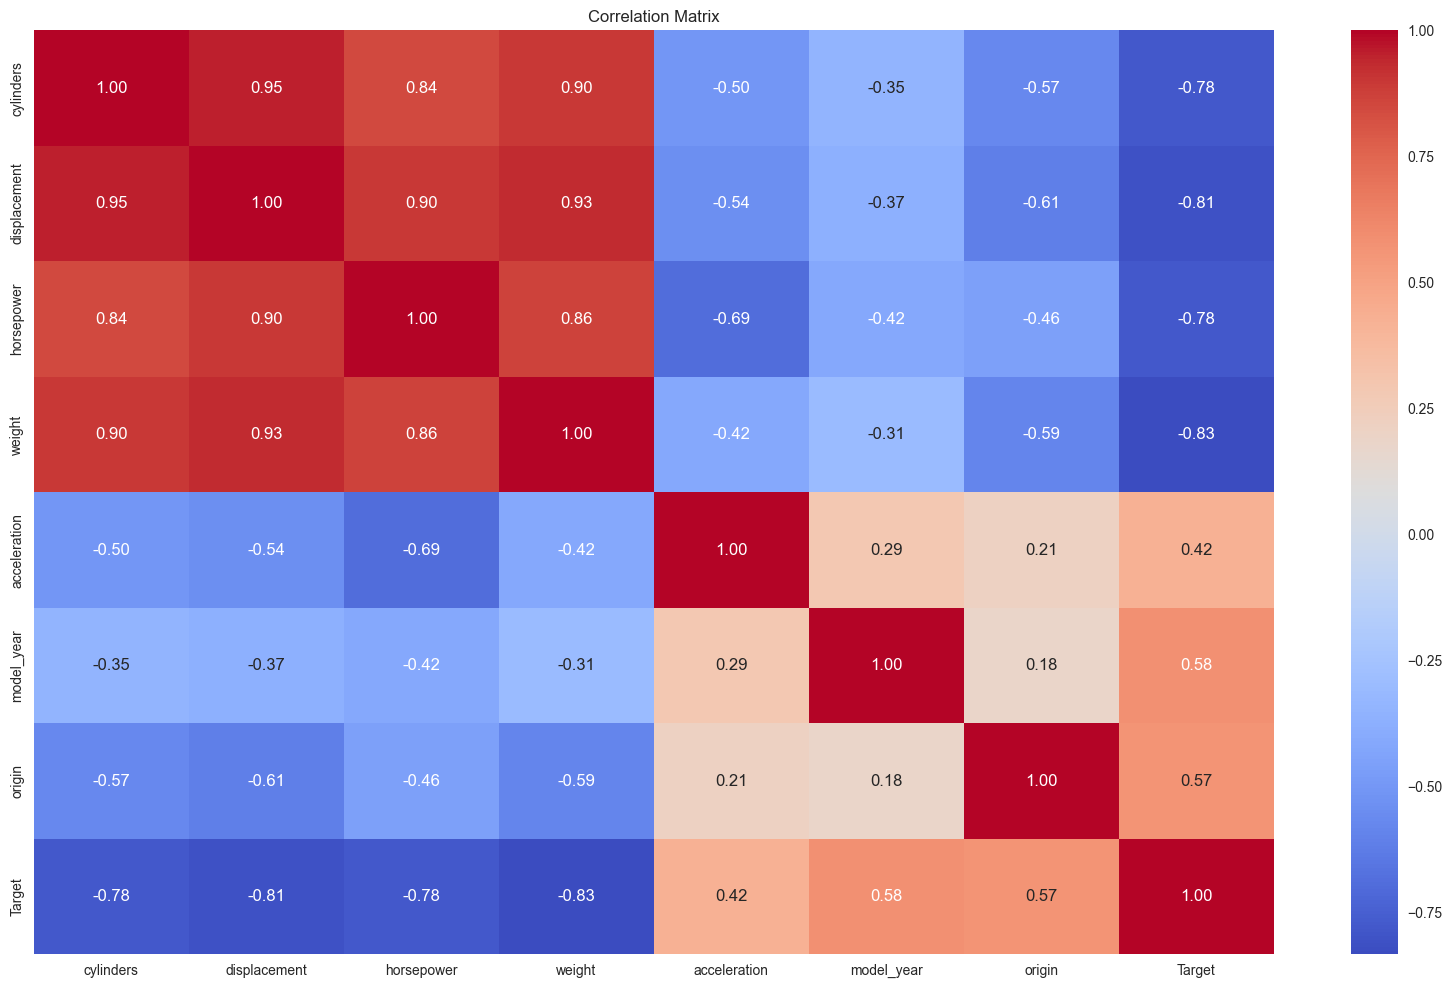

Feature Coefficients:
cylinders: -0.4124
displacement: 0.0162
horsepower: -0.0158
weight: -0.0063
acceleration: 0.0575
model_year: 0.7546
origin: 1.4615

Intercept: -17.5586


In [63]:
# TO DO: Plot pairplot (0.5 marks)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# If X is not a DataFrame, convert it
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

# Combine X and y for pairplot
data = X.copy()
data['Target'] = y

# 1. Pairplot: relationship between features and target
sns.pairplot(data)
plt.show()

# 2. Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

model = LinearRegression()
model.fit(X_train, y_train) 
# 3. Print coefficients and intercept
print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")


In [59]:
# TO DO: Plot correlation matrix (0.5 marks)


In [60]:
# TO DO: Print model coefficients and intercept (0.5 marks)


### Questions (6 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Do the coefficients for each of the features make sense when compared to the `pairplot` and the correlation matrix? Why or why not?
1. If you repeat this analysis with ridge regression, do the results change significantly? Why do you think is the cause of these (changed or unchanged) results?

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*